### Student Information
Name: 馬瑞麟

Student ID: 110072238

GitHub ID: 110072238raylinma

Kaggle name: raylin ma

Kaggle private scoreboard snapshot:

[Snapshot](pic0.png)

***Take home exercises***

In [4]:
import os
os.path.exists('C:\\Users\\gf812\\Desktop\\DM_gjthub2\\DMLab2\\DM2023-Lab2-Master\\pics\\pic0.png')


True

In [2]:
import pandas as pd 
train_df = pd.read_pickle("./semantics/train_df.pkl")
test_df = pd.read_pickle("./semantics/test_df.pkl")


**>>> Exercise 1 (Take home):**  

Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

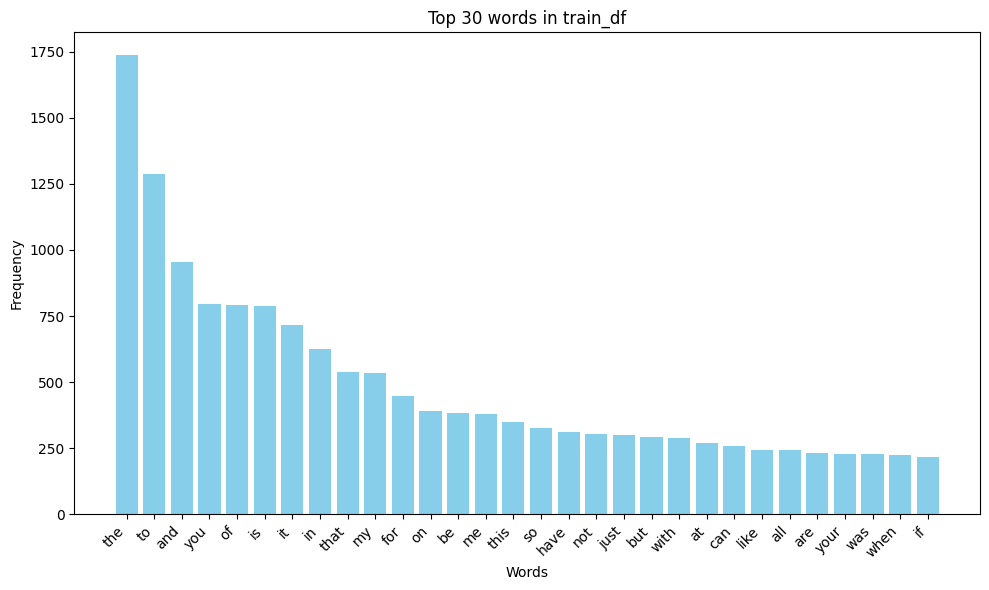

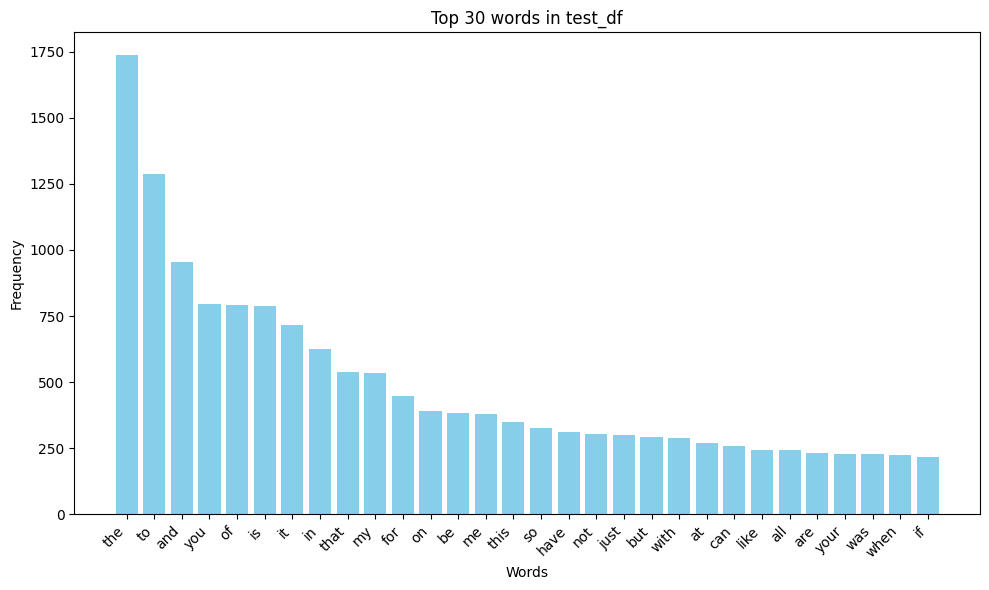

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

def draw_top30(df, title):
    count_vect = CountVectorizer()
    X_counts = count_vect.fit_transform(train_df.text)
    analyze = count_vect.build_analyzer()
    sum_words = X_counts.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in count_vect.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    words_freq = words_freq[:30]
    words = [item[0] for item in words_freq]
    frequencies = [item[1] for item in words_freq]
    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies, color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Top 30 words in {title}')
    plt.xticks(rotation=45, ha='right') 
    plt.tight_layout()
    plt.show()

draw_top30(train_df,'train_df')
draw_top30(test_df,'test_df')

**>>> Exercise 2 (Take home):**  

Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
TFIDF_1000 = TfidfVectorizer(max_features=1000,tokenizer=nltk.word_tokenize)
TFIDF_1000.fit(train_df['text'])
train_TFIDF_1000 = TFIDF_1000.transform(train_df['text'])
feature_names1000 = TFIDF_1000.get_feature_names_out()
feature_names1000[100:110]

c:\Users\gf812\anaconda3\envs\test_name\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

**>>> Exercise 3 (Take home):**  

Can you interpret the results above? What do they mean?

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
X_train = TFIDF_1000.transform(train_df['text'])
y_train = train_df['emotion']

X_test = TFIDF_1000.transform(test_df['text'])
y_test = test_df['emotion']

DT_model = DecisionTreeClassifier(random_state=10)
DT_model = DT_model.fit(X_train, y_train)
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)


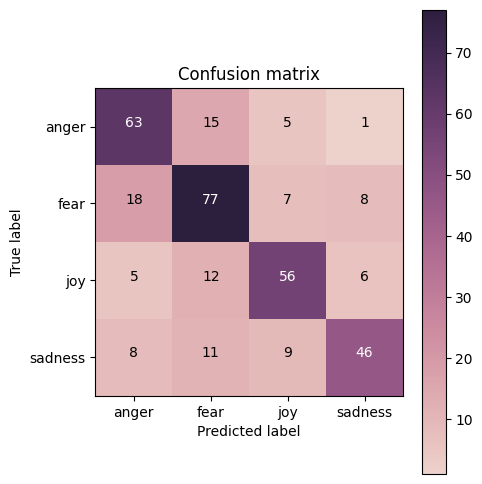

In [10]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                        cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        xticklabels = classes,
        yticklabels = classes,
        title = title,
        xlabel = 'Predicted label',
        ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

In the above picture (mine is TF-IDF version), we can see what kind of emotion is easier to be wrong predicted, and what kind of emotion is easier to be the wrong answer:  
  
For instance, we can see there are 84 true "anger", 15 of them are predicted to be "fear". We can say that in this example, the model has more confusion between anger and fear. 

Another example is that we have 115 predicted 'fear', only 77 of them are true "fear". 
 
To conclude, we can discover the probability of type 1 error and type 2 error in confusion matrix, and the label realtion among thaem.

**>>> Exercise 4 (Take home):**  
 
Build a model using a Naive Bayes model and train it. What are the testing results?

In [16]:
from sklearn.naive_bayes import MultinomialNB
NA_bayes = MultinomialNB()
NA_bayes = NA_bayes.fit(X_train, y_train)
y_train_pred2 = NA_bayes.predict(X_train)
y_test_pred2 = NA_bayes.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_test_pred2))

from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)
acc_train2 = accuracy_score(y_true=y_train, y_pred=y_train_pred2)
acc_test2 = accuracy_score(y_true=y_test, y_pred=y_test_pred2)

print('training accuracy: {}'.format(round(acc_train2, 2)))
print('testing accuracy: {}'.format(round(acc_test2, 2)))

              precision    recall  f1-score   support

       anger       0.85      0.71      0.77        84
        fear       0.66      0.92      0.77       110
         joy       0.86      0.75      0.80        79
     sadness       0.85      0.61      0.71        74

    accuracy                           0.76       347
   macro avg       0.80      0.75      0.76       347
weighted avg       0.79      0.76      0.76       347

training accuracy: 0.86
testing accuracy: 0.76


**>>> Exercise 5 (Take home):**

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [22]:
print('training accuracy of decision tree: {}'.format(round(acc_train, 2)))
print('testing accuracy of decision tree: {}'.format(round(acc_test, 2)))
print('training accuracy of naive bayes: {}'.format(round(acc_train2, 2)))
print('testing accuracy of naive bayes: {}'.format(round(acc_test2, 2)))

training accuracy of decision tree: 0.99
testing accuracy of decision tree: 0.7
training accuracy of naive bayes: 0.86
testing accuracy of naive bayes: 0.76


In [23]:
print(classification_report(y_true=y_test, y_pred=y_test_pred))
print(classification_report(y_true=y_test, y_pred=y_test_pred2))

              precision    recall  f1-score   support

       anger       0.67      0.75      0.71        84
        fear       0.67      0.70      0.68       110
         joy       0.73      0.71      0.72        79
     sadness       0.75      0.62      0.68        74

    accuracy                           0.70       347
   macro avg       0.71      0.70      0.70       347
weighted avg       0.70      0.70      0.70       347

              precision    recall  f1-score   support

       anger       0.85      0.71      0.77        84
        fear       0.66      0.92      0.77       110
         joy       0.86      0.75      0.80        79
     sadness       0.85      0.61      0.71        74

    accuracy                           0.76       347
   macro avg       0.80      0.75      0.76       347
weighted avg       0.79      0.76      0.76       347



As we can see, decision tree has a much very higher training accuracy 0.99, but lower testing accuracy compared with naive bayes, that is, the overfitting scenario is more serious in decision tree model. 

It's an emprical evidence that as the leafs and depth of decision tree increase, the model becomes more complicated, leads to overfitting, however the naive bayes assumes that all features are independent to each other, leads to less overfitting problem.

More than that, the low precision and high recall problem seems to be more clear in naive bayes model. 

In [ ]:
import keras
# standardize name (X, y) 
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 
# apply analyzer to training data
BOW_500.fit(train_df['text'])
train_data_BOW_features_500 = BOW_500.transform(train_df['text'])


X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

In [ ]:
# deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# I/O check
input_shape = X_train.shape[1]
output_shape = len(label_encoder.classes_)

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# show model construction
model.summary()

In [ ]:
from keras.callbacks import CSVLogger
csv_logger = CSVLogger('./training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

**>>> Exercise 6 (Take home):**

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

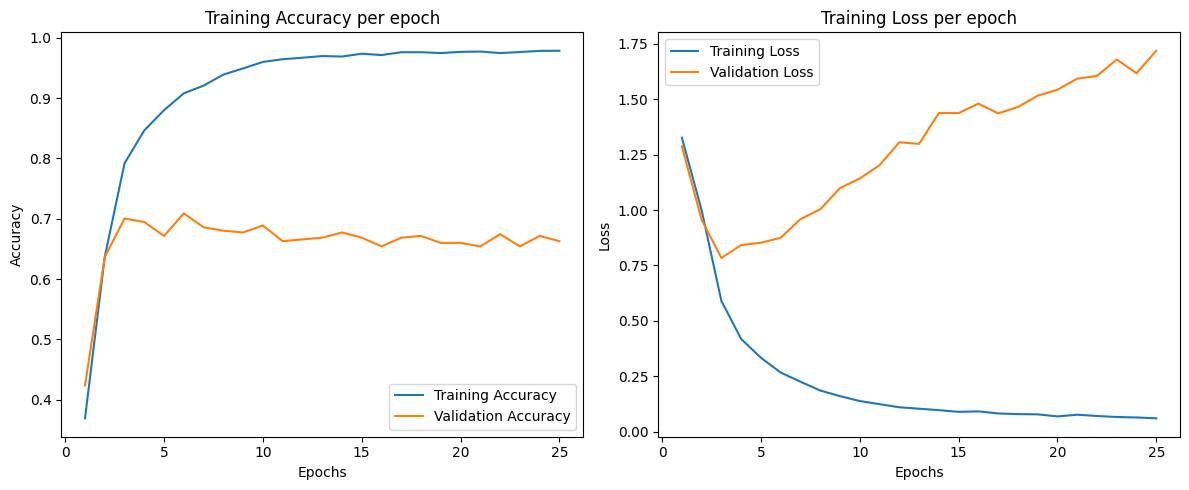

In [52]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1,26)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy per epoch')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss per epoch')
plt.legend()

plt.tight_layout()
plt.show()


As we can see the growth of training accuracy and validation accuracy are consistent in the very begining, however the valdation accuracy stops growing as training accuracy keeps growing, which represents the overfitting scenerio, we can interpret it from loss growth too.

**>>> Exercise 7 (Take home):**

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). How can we utilize these "word" vectors to represent the sentence data and train our model?

There are many ways to deal with these problems:

1. We can find the average of all the word vectors in a sentence, or even get a weighted average of them, the weights could be the importances of each word, such as TF-IDF. 

pros: The sentences vectors size is fixed, clean. Less computation demand fitted in model.  
cons: The calculation of aggregating word vectors might miss some important message, we should be cautious about how to calculate it, such as how to determine the weight in order to reduce some occuring noises.

2. Directly concat all the word vectors to be a huge vector.

pros: The sentences vectors size is fixed. No parameters to be considerd.
cons: The vectors might be sparse, might demand more ram while training models.

In [ ]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "./GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)



In [56]:
topn = 15
happy_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
angry_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]        
data_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
mining_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

target_words = happy_words + angry_words + data_words + mining_words
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn


**>>> Exercise 8 (Take home):**
 
Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

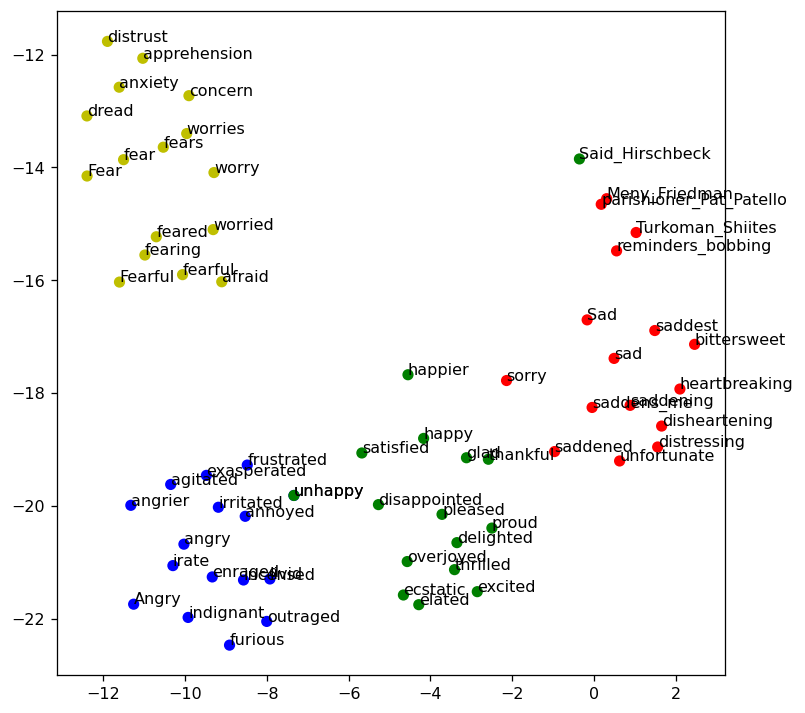

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

**competition report**

In [ ]:
import json
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from scipy.sparse import hstack
from sklearn.ensemble import RandomForestClassifier
import gensim
import warnings
warnings.filterwarnings('ignore')
from gensim.models import KeyedVectors
import sentencepiece as spm
import datetime
from sklearn.preprocessing import StandardScaler

**1. Preprocessing**

Observe the information in the json profiles, we take the basic attributes like tweet_id, hash_tag, text, score and time for our data features. As for other attributes that has no difference or importancem we just ignore them. 

We then aggregate them to a dataframe, merge the emotion with the features, and them split them according to their identification.


In [ ]:
data = []
# collect our dataset from json
with open('./tweets_DM.json', 'r') as file:
    for line in file:
        tweet_data = json.loads(line)
        tweet_id = tweet_data['_source']['tweet']['tweet_id']
        hashtag = tweet_data['_source']['tweet']['hashtags']
        text = tweet_data['_source']['tweet']['text']
        score = tweet_data['_score']
        time = tweet_data['_crawldate']
        
        datetime_obj = datetime.datetime.strptime(time, "%Y-%m-%d %H:%M:%S")
        time_of_day = datetime_obj.time()
        timestamp = (time_of_day.hour * 3600) + (time_of_day.minute * 60) + time_of_day.second 
        # We only consider the time such as 15:00 instead of date 2002.10.31.
        tweet = {
            'tweet_id': tweet_id,
            'hashtag': hashtag,
            'text': text,
            '_score': score,
            'time':timestamp
        }
        
        data.append(tweet)

df = pd.DataFrame(data)
idn = pd.read_csv("./data_identification.csv")
emo = pd.read_csv("./emotion.csv")

merged_df = pd.merge(df, idn, on='tweet_id', how='left')  
merged_df = pd.merge(merged_df,emo,on='tweet_id', how='left')
# merge our dataset

test_data = merged_df[merged_df['identification'] == 'test']
train_data = merged_df[merged_df['identification'] == 'train']
# split our dataset

**2. feature enginerring**

For hashtag and text, we use nltk tools to tokenize them and then use a pretrained word2vec to vectorize them.

For time, we only consider the hours and minutes, because we speculate that time surely affect our emotions, for example, a 2:00 am post has higher probablity to be a "emo" post.

However, the date might has some influences. After observing the dataset, the date of tweet is around the election period, but the comment of it is not in absolute mood, so we can't see the importance of it directly by guessing, we just neglect the date in this stage.  
Another consideration is that we don't have too much ram to fit a lot of features in, so if we have a better way to do the preprocess or find efficient way fitting model, we want to put the date in consideration.

After collecting the time features, we transform it to be seconds, and them normalize them, now the difference between different time is not that huge, but the ratio is unchanged. It is easier to fit in the model. Although we might miss some small sound of the time difference, but according to our guesses, a 5:00 am post is simliar to 5:10 am post, but far from 12:00 am post.

We normalize the _score as well.

In [ ]:
# normalize the numerical values
scaler = StandardScaler()
scler2 = StandardScaler()
scaled_values = scaler.fit_transform(merged_df[['time']])
merged_df['time'] = scaled_values
scaled_values2 = scaler.fit_transform(merged_df[['_score']])
merged_df['_score'] = scaled_values2

In [ ]:
# pretrained model
model_path = "./GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

# tokenize text, the hashtag is considerd to be already tokenized
train_data['text_tokenized'] = train_data['text'].apply(lambda x: nltk.word_tokenize(x))
test_data['text_tokenized'] = test_data['text'].apply(lambda x: nltk.word_tokenize(x))


def token_to_vec(sentence, model):
    try:
        vectors = [model[token] for token in sentence if token in model]
        if len(vectors) > 0:
            return np.sum(vectors, axis=0)
            # combine the words vectors to be one sentence vector
        else:
            return np.zeros(model.vector_size)  
            # if the word is not in word2vec model, we set them to be 0
    except Exception as e:
        print(e)
        return np.zeros(model.vector_size)
    
# vectorize the text and hashtag
train_data['text_vect'] = train_data['text_tokenized'].apply(lambda x: token_to_vec(x,w2v_google_model))
test_data['text_vect'] = test_data['text_tokenized'].apply(lambda x: token_to_vec(x,w2v_google_model))
train_data['hashtag_vect'] = train_data['hashtag'].apply(lambda x: token_to_vec(x,w2v_google_model))
test_data['hashtag_vect'] = test_data['hashtag'].apply(lambda x: token_to_vec(x,w2v_google_model))

**3. modeling**

My laptop can't definitely run the model, it will crush in the very beginning, so we still use kaggle to help our training or further feature engineering. Therefore we save the processed dataset to pickle file and them load them in kaggle notebook

In [ ]:
train_df = pd.read_pickle("/kaggle/input/test-and-train-lab2/train_df.pkl")
test_df = pd.read_pickle("/kaggle/input/test-and-train-lab2/test_df.pkl")
x = train_df[["_score",'text_vect','hashtag_vect']]
y = train_df['emotion']

Normally we have to sampling from the dataset due to the restricted ram, after trying and error, we think 100W ~ 120W is much efficient. I use random sampling at that time, but in fact we can sample from different emotion to make sure the label is balance while training!

In [ ]:
sample_size = 1200000 
total_samples = len(x)
sample_indices = x.sample(n=sample_size, random_state=42).index
x_sampled = x.loc[sample_indices]
y_sampled = y.loc[sample_indices]

The flat_feature is to transform the numerical feature, and them concat them in order to fit in the model, it is space consuming. This step is ready for DNN model, if we use lightGBM or random forest, we can directly fit the previous data in, but the performance of above machine learning model is not that good as deep learning model. 

I think this way to transform the fitted data is not that great, so how to deal with different type of features and making them suitble for model selected is another important course for me, in order to make them less space consuming and less information escape while transforming. 

In [ ]:
def flat_feature(model):
    text_vect_matrix = np.array(model['text_vect'].tolist())
    hashtag_vect_matrix = np.array(model['hashtag_vect'].tolist())
    numeric_features = model['_score'].values.reshape(-1, 1)  
    time = model['time'].values.reshape(-1, 1) 
    flat = np.concatenate((text_vect_matrix, hashtag_vect_matrix,numeric_features,time), axis=1)
    
    return flat

One-hot encoding for target label

In [ ]:
def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

label_encoder = LabelEncoder()
label_encoder.fit(y)

y= label_encode(label_encoder, y_sampled)

Clean the previous dataset in order to get ram, which is really really important for kaggle users

In [ ]:
del x
del y
del x_sampled
del y_sampled
del ...
gc.collect()

Build the DNN models with three layers, the input shape is 602(1+1+300+300)(time+score+hashtag+text)

In [ ]:
input_shpae = 602
# input layer
model_input = Input(shape=(input_shpae, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# 3rd hidden layer
H1_W3 = Dense(units=64)(H2)  # 64
H3 = ReLU()(H1_W3)

# output layer
H2_W4 = Dense(units=8)(H3)  # 4
H4 = Softmax()(H2_W4)

model_output = H4

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# show model construction
model.summary()

Train the model

In [ ]:
# training setting
epochs = 12
batch_size = 32

# training!
history = model.fit(x_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_data = (x_test, y_test))
print('training finish')

After training, we can directly predict the test data and submit them!